In [ ]:
import pandas as pd
!pip install scikit-learn
!pip install openpyxl
!pip install tensorflow
!pip install matplotlib
!pip install imbalanced-learn



c:\Users\Julian\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


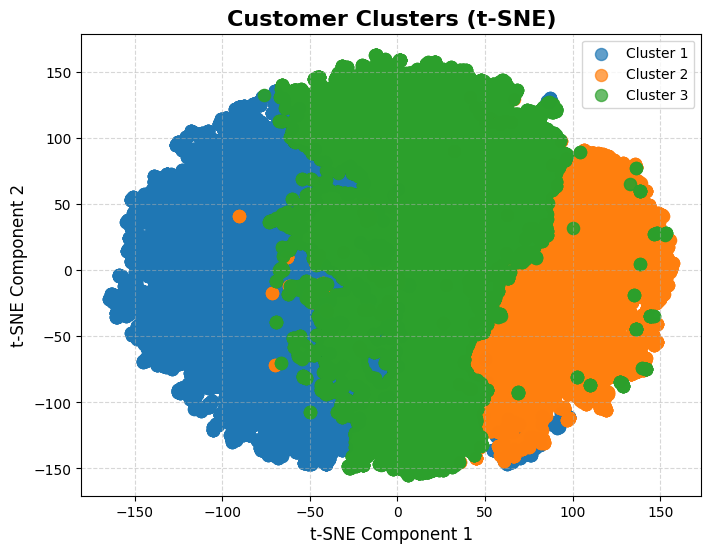

Test Accuracy: 0.9998


In [75]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Import TSNE for visualization

# Read data
data = pd.read_excel("data_customer_classification 1.xlsx")

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['tran_amount'] = imputer.fit_transform(data[['tran_amount']])

# Handle date (if needed)
# Assuming you don't need date for this model, comment out the following line
data["trans_date"] = pd.to_datetime(data["trans_date"])

# Encode categorical features
le = LabelEncoder()
data["customer_id"] = le.fit_transform(data["customer_id"])

# Feature engineering
data["shopping_frequency"] = data.groupby("customer_id")["trans_date"].transform("count")
data["avg_transaction_amt"] = data.groupby("customer_id")["tran_amount"].transform("mean")
data["monthly_txn_freq"] = data.groupby(["customer_id", data["trans_date"].dt.month])["trans_date"].transform("count")

# Calculate duration of relationship with customer
first_transaction_date = data.groupby("customer_id")["trans_date"].transform("min")
last_transaction_date = data.groupby("customer_id")["trans_date"].transform("max")
data["relationship_duration"] = (last_transaction_date - first_transaction_date).dt.days

# Calculate variance of transaction amounts
data["transaction_amt_variance"] = data.groupby("customer_id")["tran_amount"].transform("var")

# Feature selection
features = ["shopping_frequency", "avg_transaction_amt", "monthly_txn_freq", "relationship_duration", "transaction_amt_variance"]

# Feature scaling (consider if features have different scales)
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

# Define customer category labels using k-means clustering (with adjustments)
n_clusters = 3  # Ajustable
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
y = kmeans.fit_predict(X)

# Visualize clusters with multiple options

# 1. Visualization with TSNE
tsne_model = TSNE(n_components=2, random_state=0)
tsne_data = tsne_model.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(tsne_data[y == i, 0], tsne_data[y == i, 1], s=75, alpha=0.7, label='Cluster ' + str(i+1))

plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('Customer Clusters (t-SNE)', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Handle class imbalance (using SMOTE)
# Get the number of data points in each class
class_counts = pd.Series(y).value_counts()
# Define the SMOTE oversampling strategy
oversample = SMOTE(sampling_strategy=class_counts.to_dict(), random_state=42)

# Oversample the training data
X_train, y_train = oversample.fit_resample(X, y)  # Combine X and y for oversampling

# Split data into training and testing sets (using StratifiedShuffleSplit for class balance)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)  # Maintain class balance
for train_index, test_index in sss.split(X_train, y_train):
    X_train_final, X_test_final = X_train[train_index], X_train[test_index]
    y_train_final, y_test_final = y_train[train_index], y_train[test_index]

# Define the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
model.fit(X_train_final, y_train_final)

# Evaluate the model
y_pred = model.predict(X_test_final)

accuracy = accuracy_score(y_test_final, y_pred)
print("Test Accuracy:", accuracy)


In [78]:
# Define a test customer with additional features (replace placeholders)
test_customer_id = "CS1234"  # Replace with actual ID

# Design test cases for each category:

# Medium Spenders (Moderate shopping frequency, moderate average amount)
test_data_medium_1 = pd.DataFrame({
    "customer_id": ["CS1237"],
    "shopping_frequency": [12],
    "avg_transaction_amt": [20],
    "monthly_txn_freq": [2],
    "relationship_duration": [5],
    "transaction_amt_variance": [15],
})

# Caso de prueba 2: Comprador moderado
test_data_medium_2 = pd.DataFrame({
    "customer_id": ["CS1238"],
    "shopping_frequency": [15],
    "avg_transaction_amt": [25],
    "monthly_txn_freq": [3],
    "relationship_duration": [2],
    "transaction_amt_variance": [20],
})

# Caso de prueba 3: Comprador activo
test_data_medium_3 = pd.DataFrame({
    "customer_id": ["CS1239"],
    "shopping_frequency": [18],
    "avg_transaction_amt": [18],
    "monthly_txn_freq": [4],
    "relationship_duration": [8],
    "transaction_amt_variance": [12],
})

# Caso de prueba 1: Comprador ávido
test_data_high_1 = pd.DataFrame({
    "customer_id": ["CS1240"],
    "shopping_frequency": [30],
    "avg_transaction_amt": [35],
    "monthly_txn_freq": [5],
    "relationship_duration": [10],
    "transaction_amt_variance": [25],
})

# Caso de prueba 2: Comprador entusiasta
test_data_high_2 = pd.DataFrame({
    "customer_id": ["CS1241"],
    "shopping_frequency": [25],
    "avg_transaction_amt": [40],
    "monthly_txn_freq": [6],
    "relationship_duration": [7],
    "transaction_amt_variance": [30],
})

# Caso de prueba 3: Comprador apasionado
test_data_high_3 = pd.DataFrame({
    "customer_id": ["CS1242"],
    "shopping_frequency": [35],
    "avg_transaction_amt": [50],
    "monthly_txn_freq": [6],
    "relationship_duration": [12],
    "transaction_amt_variance": [35],
})


# Preprocess test customer data (assuming features and functions are defined)
category_names = ["High", "Medium", "Low"]  # Adjust based on your k-means cluster labels

def predict_category(test_data):
    test_data["customer_id"] = le.transform(test_data["customer_id"])
    test_X = scaler.transform(test_data[features])
    predicted_category = model.predict(test_X)[0]
    print(f"Predicted Category: {category_names[predicted_category]}")


print("Medium Spender Test Cases:")
predict_category(test_data_medium_1)
predict_category(test_data_medium_2)
predict_category(test_data_medium_3)

print("High Spender Test Cases:")
predict_category(test_data_high_1)
predict_category(test_data_high_2)
predict_category(test_data_high_3)



Medium Spender Test Cases:
Predicted Category: Medium
Predicted Category: Medium
Predicted Category: Medium
High Spender Test Cases:
Predicted Category: High
Predicted Category: High
Predicted Category: High
